# MLP LAB2

In [127]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.datasets import *
import matplotlib.pyplot as plt
import copy

from utils import *
from InputUnit import *
from NeuralUnit import *
from Loss import *
from MLP import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


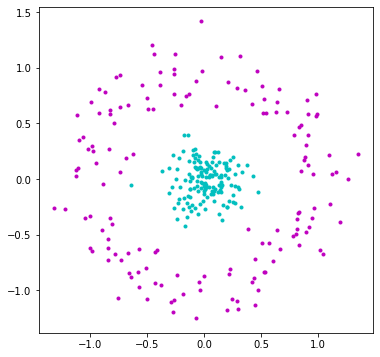

In [128]:
X,y = make_circles(n_samples = 300,noise=0.15, factor=0.1)
n,d = X.shape
plt.figure(1,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.c')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.m')
plt.show()

## Exercise n°1 : Network Creation

In [129]:
# Creation of the 3 Neural Units instances of our MLP
Nu10 = NeuralUnit(1,0)
Nu11 = NeuralUnit(1,1)
Nu20 = NeuralUnit(2,0)

# Creation of a Loss instance
LossUnit = Loss(y,2)

#Creation of the network
network = MLP(X,y,[2,2,1])

## Exercise n°2 : Forward pass

In [130]:
print(network.forward(4))

1.3738320371949544


## Exercise n°3 : Back Propagation

In [131]:

i = 0
archi = [d,10,1]
mlp = MLP(X,y,archi)
mlp.forward(i)
mlp.backprop(i)
epsi=1e-3
mlp2 = copy.deepcopy(mlp)
mlp2.net[1][0].w[0] = mlp.net[1][0].w[0]+epsi
print("numerical derivative is : ",(mlp2.forward(i) - mlp.forward(i))/epsi)
print("computed derivative is : ",mlp.net[1][0].w_grad[0])

numerical derivative is :  0.1608642846915309
computed derivative is :  0.16089486540614029


## Exercise n°4 : SGD training of the network

In [132]:
mlp.train(50,0.01)

epoch  0 / 50 ...
epoch  10 / 50 ...
epoch  20 / 50 ...
epoch  30 / 50 ...
epoch  40 / 50 ...
epoch 50 / 50 ...


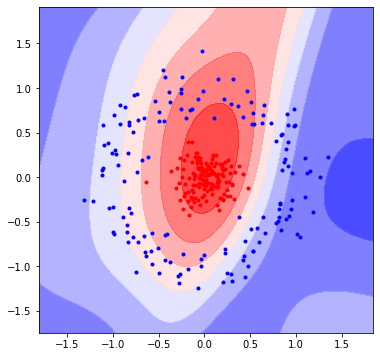

In [133]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()

## Let's try with another dataset :

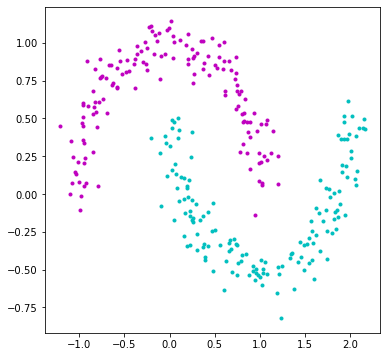

In [134]:
X,y = make_moons(n_samples = 300,noise=0.1)
n,d = X.shape
plt.figure(1,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.c')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.m')
plt.show()

In [135]:
archi = [d,10,1]
mlp = MLP(X,y,archi)
mlp.train(50,0.01)

epoch  0 / 50 ...
epoch  10 / 50 ...
epoch  20 / 50 ...
epoch  30 / 50 ...
epoch  40 / 50 ...
epoch 50 / 50 ...


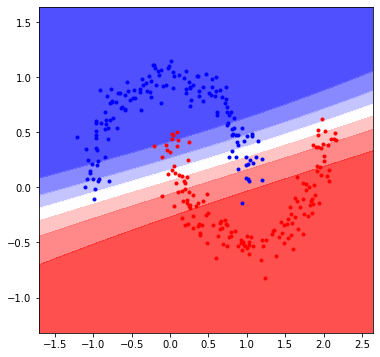

In [136]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()

We sse here that for a more complex dataset, the previous mlp fit less the data.

Let's try with a bigger hidden layer with 30 neurons instead of 10 :

In [137]:
archi = [d,30,1]
mlp = MLP(X,y,archi)
mlp.train(50,0.01)

epoch  0 / 50 ...
epoch  10 / 50 ...
epoch  20 / 50 ...
epoch  30 / 50 ...
epoch  40 / 50 ...
epoch 50 / 50 ...


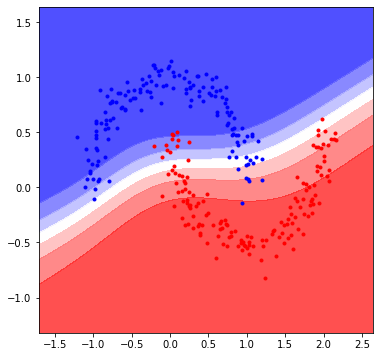

In [138]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()

We see it gives better results, can we do better by incresing the number of layer instead ?

Let's try with 3 hidden layer of 5 neurons each :

In [139]:
archi = [d,5,5,5,1]
mlp = MLP(X,y,archi)
mlp.train(50,0.01)

epoch  0 / 50 ...
epoch  10 / 50 ...
epoch  20 / 50 ...
epoch  30 / 50 ...
epoch  40 / 50 ...
epoch 50 / 50 ...


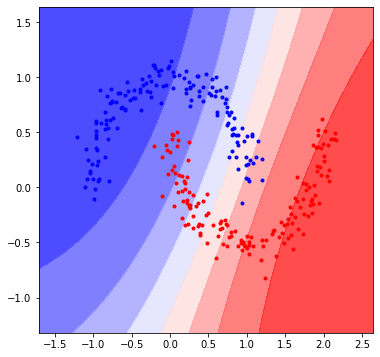

In [140]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()

The first thing we can say is that it takes much longer to train the model and to plot it. This was expected because the number of parameters to train is much bigger than with a single hidden layer of 30 neurons.

Moreover, the results are bad, we prefer add more neurons on a single layer, that add several layers.

Maybe a solution to this issue, is to increase the number of epochs, as there is more parameters, the algorithm needs more epochs to train them.

Let's return to our first architecture, but this time, we increase the number of points in the dataset (from 300 to 1000) :

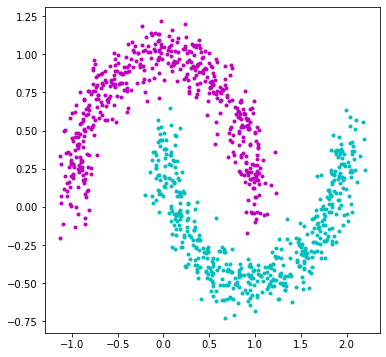

epoch  0 / 50 ...
epoch  10 / 50 ...
epoch  20 / 50 ...
epoch  30 / 50 ...
epoch  40 / 50 ...
epoch 50 / 50 ...


In [141]:
X,y = make_moons(n_samples = 1000,noise=0.1)
n,d = X.shape
plt.figure(1,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.c')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.m')
plt.show()

archi = [d,10,1]
mlp = MLP(X,y,archi)
mlp.train(50,0.01)

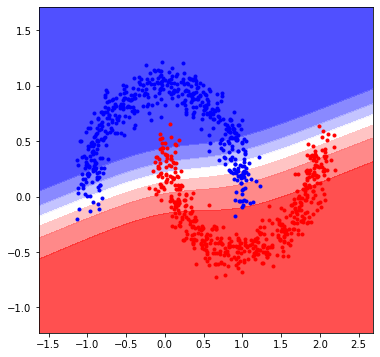

In [142]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()

Now the results seems much better even if it takes a little bit more time to train the mlp.

Finally, we can try with a higher learning rate (from 0.01 to 0.5) :

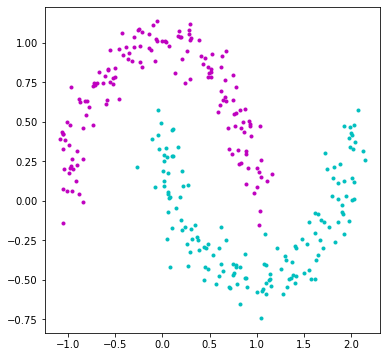

epoch  0 / 50 ...
epoch  10 / 50 ...
epoch  20 / 50 ...
epoch  30 / 50 ...
epoch  40 / 50 ...
epoch 50 / 50 ...


In [143]:
X,y = make_moons(n_samples = 300,noise=0.1)
n,d = X.shape
plt.figure(1,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.c')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.m')
plt.show()


archi = [d,10,1]
mlp = MLP(X,y,archi)
mlp.train(50,0.5)

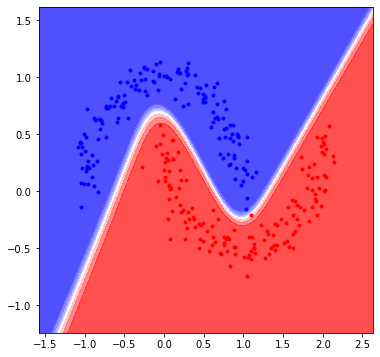

In [144]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()

We see a great evolution, by increasing the learning rate, we have the best solution in a short time, without changing the mlp architecture or the number of datasets.

It seems that the first parameter to change if the results are bads is the learning rate, to see if the algorithm doesn't converge too slowly to the minimum.

